In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

In [ ]:
routes = pd.read_csv('./OpenData_TTC_Schedules/routes.txt', low_memory=False)
trips = pd.read_csv('./OpenData_TTC_Schedules/trips.txt', low_memory=False)
stops = pd.read_csv('./OpenData_TTC_Schedules/stops.txt', low_memory=False)
stop_times = pd.read_csv('./OpenData_TTC_Schedules/stop_times.txt', low_memory=False)

In [ ]:
routes.info()

In [ ]:
trips.info()

In [ ]:
stops.info()

In [ ]:
stop_times.info()

In [ ]:
print("This shape of route: ", routes.shape)

In [ ]:
trips.shape

In [10]:
stops.shape

(10649, 11)

In [11]:
stop_times.shape

(4329783, 9)

In [12]:
routes.head()
routes = routes.drop(['agency_id', 'route_desc', 'route_url', 'route_color', 'route_text_color'], axis = 1)

In [13]:
routes.head()

,route_id,route_short_name,route_long_name,route_type
0,55518,1,LINE 1 (YONGE-UNIVERSITY),1
1,55309,10,VAN HORNE,3
2,55310,100,FLEMINGDON PARK,3
3,55311,101,DOWNSVIEW PARK,3
4,55312,102,MARKHAM RD.,3


In [14]:
trips.head()
trips = trips.drop(['service_id', 'trip_short_name', 'direction_id', 'block_id', 'shape_id'], axis = 1)

In [15]:
trips.head()

,route_id,trip_id,trip_headsign,wheelchair_accessible
0,55309,37075813,EAST - 10 VAN HORNE TOWARDS VICTORIA PARK,1
1,55309,37075794,EAST - 10 VAN HORNE TOWARDS VICTORIA PARK,1
2,55309,37075821,EAST - 10 VAN HORNE TOWARDS VICTORIA PARK,1
3,55309,37075797,EAST - 10 VAN HORNE TOWARDS VICTORIA PARK,1
4,55309,37075791,EAST - 10 VAN HORNE TOWARDS VICTORIA PARK,1


In [16]:
stops.head()
stops = stops.drop(['zone_id', 'stop_url', 'location_type', 'parent_station', 'wheelchair_boarding', 'stop_desc'], axis = 1)

In [17]:
stops.head()

,stop_id,stop_code,stop_name,stop_lat,stop_lon
0,262,662,DANFORTH RD AT KENNEDY RD,43.714395,-79.260962
1,263,929,DAVENPORT RD AT BEDFORD RD,43.674448,-79.399696
2,264,940,DAVENPORT RD AT DUPONT ST,43.675540,-79.401960
3,265,1871,DAVISVILLE AVE AT CLEVELAND ST,43.702096,-79.378146
4,266,11700,DISCO RD AT ATTWELL DR,43.701331,-79.594777


In [18]:
stop_times.head()
stop_times = stop_times.drop(['stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled'], axis = 1)

In [19]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,37075791,6:15:00,6:15:00,13173,1
1,37075791,6:15:22,6:15:22,14155,2
2,37075791,6:16:11,6:16:11,3807,3
3,37075791,6:17:33,6:17:33,6904,4
4,37075791,6:18:48,6:18:48,1163,5


In [20]:
route_trip = pd.merge(routes, trips, on='route_id')
route_trip.head()

,route_id,route_short_name,route_long_name,route_type,trip_id,trip_headsign,wheelchair_accessible
0,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181522,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1
1,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181510,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1
2,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181426,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1
3,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181427,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1
4,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181428,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1


In [21]:
route_trip_stop_times = pd.merge(route_trip, stop_times, on = 'trip_id')
route_trip_stop_times.head()

,route_id,route_short_name,route_long_name,route_type,trip_id,trip_headsign,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence
0,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181522,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:31:21,5:31:21,14404,1
1,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181522,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:33:40,5:33:40,14405,2
2,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181522,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:34:46,5:34:46,14406,3
3,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181522,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:37:52,5:37:52,14407,4
4,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181522,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:41:07,5:41:07,14408,5


In [22]:
route_trip_stop = pd.merge(route_trip_stop_times, stops, on = 'stop_id')
route_trip_stop.head()

,route_id,route_short_name,route_long_name,route_type,trip_id,trip_headsign,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_name,stop_lat,stop_lon
0,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181522,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:31:21,5:31:21,14404,1,14111,FINCH STATION - SOUTHBOUND PLATFORM,43.780847,-79.415291
1,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181510,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:36:03,5:36:03,14404,1,14111,FINCH STATION - SOUTHBOUND PLATFORM,43.780847,-79.415291
2,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181426,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:40:45,5:40:45,14404,1,14111,FINCH STATION - SOUTHBOUND PLATFORM,43.780847,-79.415291
3,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181427,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:45:27,5:45:27,14404,1,14111,FINCH STATION - SOUTHBOUND PLATFORM,43.780847,-79.415291
4,55518,1,LINE 1 (YONGE-UNIVERSITY),1,37181428,LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...,1,5:50:09,5:50:09,14404,1,14111,FINCH STATION - SOUTHBOUND PLATFORM,43.780847,-79.415291


In [23]:
route_trip_stop.shape

(4329783, 15)

In [24]:
route_trip_stop.corr()

,route_id,route_short_name,route_type,trip_id,wheelchair_accessible,stop_id,stop_sequence,stop_lat,stop_lon
route_id,1.000000,0.191679,-0.168061,0.386473,0.029416,0.083260,-0.017651,-0.062150,-0.063009
route_short_name,0.191679,1.000000,-0.453088,0.001039,0.357113,0.060935,-0.066515,-0.193493,-0.011895
route_type,-0.168061,-0.453088,1.000000,-0.115629,-0.633630,-0.153280,0.010572,0.380126,0.004733
trip_id,0.386473,0.001039,-0.115629,1.000000,-0.000956,0.073094,0.001847,-0.039516,-0.028514
wheelchair_accessible,0.029416,0.357113,-0.633630,-0.000956,1.000000,-0.029425,0.110409,-0.274883,0.009788
stop_id,0.083260,0.060935,-0.153280,0.073094,-0.029425,1.000000,-0.053868,-0.058786,-0.010388
stop_sequence,-0.017651,-0.066515,0.010572,0.001847,0.110409,-0.053868,1.000000,0.136284,0.028016
stop_lat,-0.062150,-0.193493,0.380126,-0.039516,-0.274883,-0.058786,0.136284,1.000000,0.422623
stop_lon,-0.063009,-0.011895,0.004733,-0.028514,0.009788,-0.010388,0.028016,0.422623,1.000000


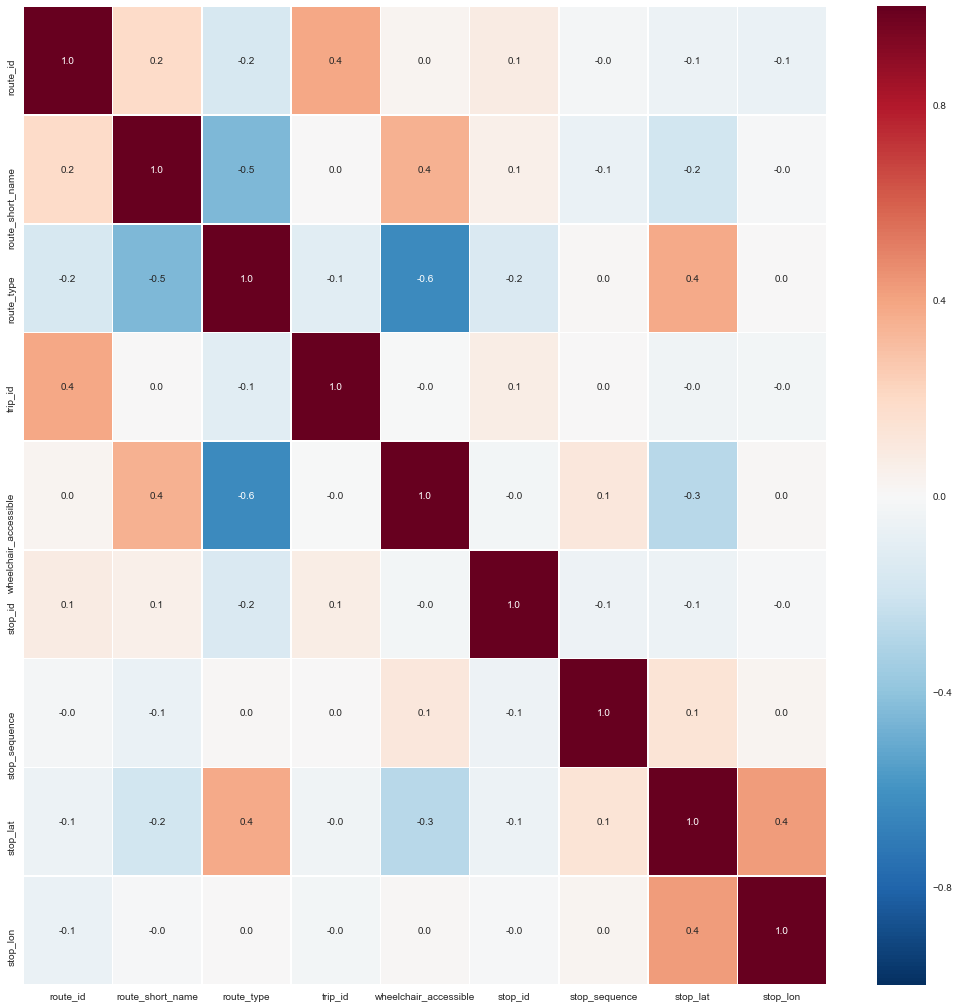

In [25]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(route_trip_stop.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

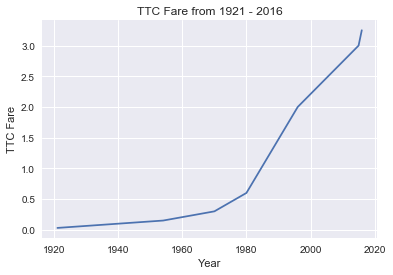

In [26]:
year = [1921, 1954, 1970, 1980, 1996, 2015, 2016]
fare = [0.03, 0.15, 0.30, 0.60, 2, 3, 3.25]
plt.plot(year, fare)
plt.xlabel("Year")
plt.ylabel("TTC Fare")
plt.title("TTC Fare from 1921 - 2016")

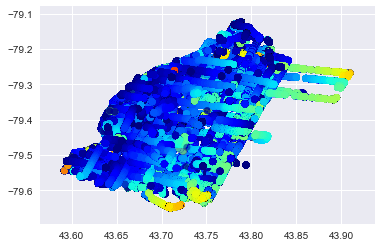

In [27]:
xs = route_trip_stop["stop_lat"]
ys = route_trip_stop["stop_lon"]
sz = route_trip_stop["stop_sequence"]
cm = plt.get_cmap('jet')
plt.scatter(xs, ys, c = sz, cmap = cm, alpha=0.3, edgecolors='None')

In [28]:
exp = route_trip_stop.groupby(['route_long_name']).count()
exp = pd.DataFrame(exp).sort_values(by = "trip_id", ascending = False)
exp = pd.DataFrame(exp).reset_index()
exp

,route_long_name,route_id,route_short_name,route_type,trip_id,trip_headsign,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_name,stop_lat,stop_lon
0,QUEEN,139890,139890,139890,139890,139890,139890,139890,139890,139890,139890,139890,139890,139890,139890
1,LAWRENCE WEST,115070,115070,115070,115070,115070,115070,115070,115070,115070,115070,115070,115070,115070,115070
2,KING,98588,98588,98588,98588,98588,98588,98588,98588,98588,98588,98588,98588,98588,98588
3,EGLINTON WEST,91762,91762,91762,91762,91762,91762,91762,91762,91762,91762,91762,91762,91762,91762
4,LAWRENCE EAST,90834,90834,90834,90834,90834,90834,90834,90834,90834,90834,90834,90834,90834,90834
5,FINCH WEST,90133,90133,90133,90133,90133,90133,90133,90133,90133,90133,90133,90133,90133,90133
6,BATHURST,87326,87326,87326,87326,87326,87326,87326,87326,87326,87326,87326,87326,87326,87326
7,STEELES EAST,86618,86618,86618,86618,86618,86618,86618,86618,86618,86618,86618,86618,86618,86618
8,SHEPPARD EAST,79718,79718,79718,79718,79718,79718,79718,79718,79718,79718,79718,79718,79718,79718
9,CARLTON,77025,77025,77025,77025,77025,77025,77025,77025,77025,77025,77025,77025,77025,77025


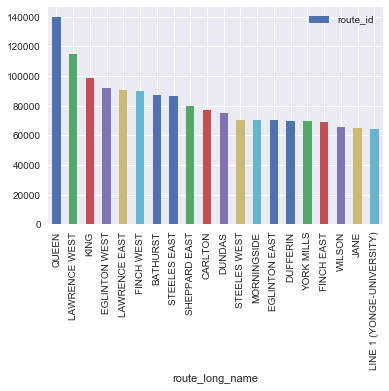

In [29]:
exp2 = exp.head(20)
exp2.plot.bar(x = 'route_long_name', y = 'route_id')

In [30]:
lon = route_trip_stop.groupby(['stop_lon']).count()
lon = lon.sort_values(by = "trip_id", ascending = False)
lon.head(20)

,route_id,route_short_name,route_long_name,route_type,trip_id,trip_headsign,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_name,stop_lat
stop_lon,,,,,,,,,,,,,,
-79.258146,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484
-79.263685,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918
-79.415011,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839
-79.535423,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
-79.509285,5738,5738,5738,5738,5738,5738,5738,5738,5738,5738,5738,5738,5738,5738
-79.398706,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218
-79.358222,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897
-79.302183,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581
-79.279570,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313


In [31]:
lat = route_trip_stop.groupby(['stop_lat']).count()
lat = lat.sort_values(by = "trip_id", ascending = False)
lat.head(20)

,route_id,route_short_name,route_long_name,route_type,trip_id,trip_headsign,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_name,stop_lon
stop_lat,,,,,,,,,,,,,,
43.774232,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484
43.732489,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918
43.781006,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839
43.637835,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
43.776858,5681,5681,5681,5681,5681,5681,5681,5681,5681,5681,5681,5681,5681,5681
43.704614,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218
43.677011,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897
43.688918,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581
43.683160,4523,4523,4523,4523,4523,4523,4523,4523,4523,4523,4523,4523,4523,4523


In [32]:
lon_lat = route_trip_stop.groupby(['stop_lat', 'stop_lon']).count()
lon_lat = lon_lat.sort_values(by = "trip_id", ascending = False)
lon_lat = lon_lat.head(20)
lon_lat

,,route_id,route_short_name,route_long_name,route_type,trip_id,trip_headsign,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_code,stop_name
stop_lat,stop_lon,,,,,,,,,,,,,
43.774232,-79.258146,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484,7484
43.732489,-79.263685,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918,6918
43.781006,-79.415011,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839,6839
43.637835,-79.535423,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
43.704614,-79.398706,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218,5218
43.776858,-79.509285,5102,5102,5102,5102,5102,5102,5102,5102,5102,5102,5102,5102,5102
43.677011,-79.358222,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897,4897
43.688918,-79.302183,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581,4581
43.711551,-79.279570,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313


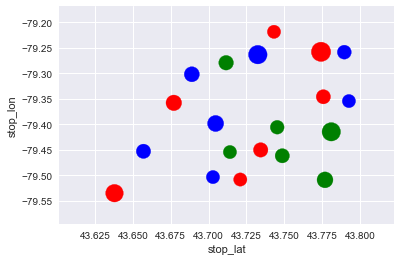

In [33]:
cm = plt.get_cmap('jet')
size = np.array(lon_lat["route_id"])
lon_lat.reset_index().plot.scatter(x = "stop_lat", y = "stop_lon", s= size/20, c=['red', 'blue', 'green'])

In [34]:
shapes = pd.read_csv('./OpenData_TTC_Schedules/shapes.txt', low_memory=False)

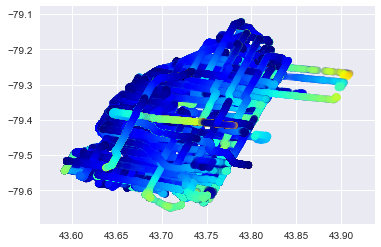

In [35]:
shape = shapes
xs = shape["shape_pt_lat"]
ys = shape["shape_pt_lon"]
sz = shape["shape_dist_traveled"]
cm = plt.get_cmap('jet')
plt.scatter(xs, ys, c = sz, cmap = cm, alpha=0.3, edgecolors='None')

In [47]:
import folium
from folium import plugins

In [71]:
m = folium.Map([43.774232, -79.258146], zoom_start=11)
m

In [64]:
lon_lat = lon_lat.reset_index()
locations = lon_lat[['stop_lat', 'stop_lon']]
locationlist = locations.values.tolist()

In [81]:
m = folium.Map([43.774232, -79.258146], zoom_start=11)
#for point in range(0, len(locationlist)):
#    folium.Marker(locationlist[point]).add_to(m)
folium.Marker(locationlist[0]).add_to(m)
m

In [89]:
heat_data = [[[index['stop_lat'],index['stop_lon']] for index in lon_lat]]
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(m)
m

TypeError: string indices must be integers